# Lending Club Case Study

## Initializing all imports of libraries needed

#### Assumption : Analysing to get the prediction for new/first time loan applicants

In [127]:
#importing all required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## Data retrival and initial observations

In [128]:
#importing the csv file and assigning it to variable data. Got an error initially and added the paramater low_memory = Falseto fix the issue.
#The error message got without the flag is related to the pandas. It indicates that there is a warning about mixed data types in column 47 of the CSV file that was being read
#Setting low_memory=False disables the memory optimization when reading the file, which can help resolve the warning.

data = pd.read_csv("loan.csv", low_memory=False)

In [129]:
#check the shape of the data
data.shape

(39717, 111)

In [130]:
#preview the data in the csv
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##### On observing the data from the csv , it is clear that there are 39717 rows of data with 111 columns in the file. For the purpose of this assignment , we might not need all data present and hence some columns can be discarded . We will attempt to identify irrelavent data for this assignment in the following steps

## Data Clean Up Process 
### Clearing columns with missing values in all rows

In [131]:
# we have 111 columns in the csv file and on examination of the data initially, we found there are multiple columns with NaN as data for all rows 
# as part of cleaning up the data we have, we will first remove these columns as they will not contribute to our analysis

# first lets check if such columns exist from out initial hypothesis by getting sum of all null rows for every column
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [132]:
#There are a lot of columns with only null values.Lets first remove them
data = data.dropna(axis=1,how="all")

In [133]:
data.shape

(39717, 57)

In [134]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### We have now reduced the number of columns to Analyse from 111 to 57. but there are still some columns remaining that does not contribute to our analysis. We will now try to identify them and remove them as well

In [135]:
#to drop the rowws twiht more than 5 null values
#len(data[data.isnull().sum(axis=1)>5])

In [136]:
# data =data.drop(data[data.isnull().sum(axis=1)>5].index,axis=0)

In [137]:
data.shape

(39717, 57)


#### upon first glance in the csv file following obeservations were made
- Does not serve the analysis
- url has the same url for all loans with loan id
- desc - description 
- policy code

- Columns with unique values tha don't serve the purpose
- pymnt_plan looks like it only has value 'n'
- initial_list_status looks like it only has value 'f'
- application_type looks like it only has value 'INDIVIDUAL'
- acc_now_delinq looks like it only has 0 value
- chargeoff_within_12_mths looks like it only has 0 value
- delinq_amnt looks like it only has 0 value
- tax_liens looks like all values are 0

In [138]:
#check if assumptions are true
pymnt_plan = data['pymnt_plan'].unique()
initial_list_status = data['initial_list_status'].unique()
application_type = data['application_type'].unique()
acc_now_delinq = data['acc_now_delinq'].unique()
chargeoff_within_12_mths = data['chargeoff_within_12_mths'].unique()
collections_12_mths_ex_med = data['collections_12_mths_ex_med'].unique()
delinq_amnt = data['delinq_amnt'].unique()
tax_liens = data['tax_liens'].unique()
print('pymnt_plan values = ',pymnt_plan)
print('initial_list_status values = ',initial_list_status)
print('application_type values = ',application_type)
print('acc_now_delinq values = ',acc_now_delinq)
print('chargeoff_within_12_mths values = ',chargeoff_within_12_mths)
print('delinq_amnt values = ',delinq_amnt)
print('tax_liens values = ',tax_liens)

pymnt_plan values =  ['n']
initial_list_status values =  ['f']
application_type values =  ['INDIVIDUAL']
acc_now_delinq values =  [0]
chargeoff_within_12_mths values =  [ 0. nan]
delinq_amnt values =  [0]
tax_liens values =  [ 0. nan]


In [139]:
data = data.drop(['url','policy_code','desc','pymnt_plan','initial_list_status','application_type','acc_now_delinq','chargeoff_within_12_mths','tax_liens'],axis=1)

In [140]:
data.shape

(39717, 48)

In [141]:
# remove columns where all values are 0

columns_to_remove = data.columns[data.eq(0).all()]
data = data.drop(columns=columns_to_remove)
data.head()

# successfully removed 2 columns.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0


In [142]:
data.shape

(39717, 47)

In [143]:
data['id'].nunique() == len(data['id'])

True

In [144]:
data['member_id'].nunique() == len(data['member_id'])

True

In [145]:
data = data.drop(['id'],axis=1)

In [146]:
data.shape

(39717, 46)

In [147]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0


### Checking if any of the rows have shifted values

In [148]:
data.dtypes

member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
mths_since_last_delinq        float64
mths_since_last_record        float64
open_acc    

In [149]:
data.pub_rec_bankruptcies

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: pub_rec_bankruptcies, Length: 39717, dtype: float64

### Convert the columns to required data types

In [150]:
#removed rows with loan status as Current
data= data[data.loan_status != "Current"]

In [151]:
data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [152]:
#convert term column to int
data.term = data.term.str.rstrip(" months")

In [153]:
data.term = data.term.astype("int32")

In [154]:
data.term.dtype

dtype('int32')

In [155]:
#interest rate column to int
data.int_rate = data.int_rate.str.rstrip("%")

In [156]:
data.int_rate = data.int_rate.astype("float64")

In [157]:
data.int_rate.dtype

dtype('float64')

In [158]:
#now let's extract year and month from date column
data.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [159]:
data['date'] = pd.to_datetime(data.issue_d, format="%b-%y")

In [160]:
data['date'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: date, dtype: datetime64[ns]

In [161]:
data['year'] = pd.DatetimeIndex(data['date']).year

In [162]:
data.year.value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: year, dtype: int64

In [163]:
data['month'] = pd.DatetimeIndex(data['date']).month

In [164]:
data['month'].value_counts()

12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: month, dtype: int64

### Comparing Loan amount and Funded amount

Text(0.5, 1.0, 'Funded Amount')

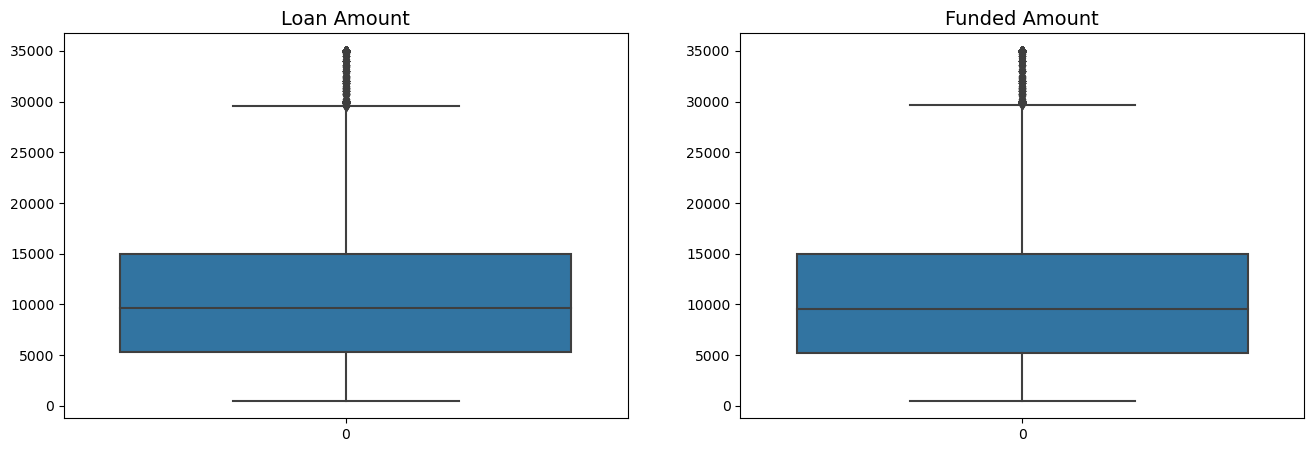

In [165]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.boxplot(data["loan_amnt"].values , ax = ax[0])
ax[0].set_title("Loan Amount", fontsize=14)
sns.boxplot(data["funded_amnt"].values, ax=ax[1])
ax[1].set_title("Funded Amount", fontsize=14)

Text(0.5, 1.0, 'Funded Amount')

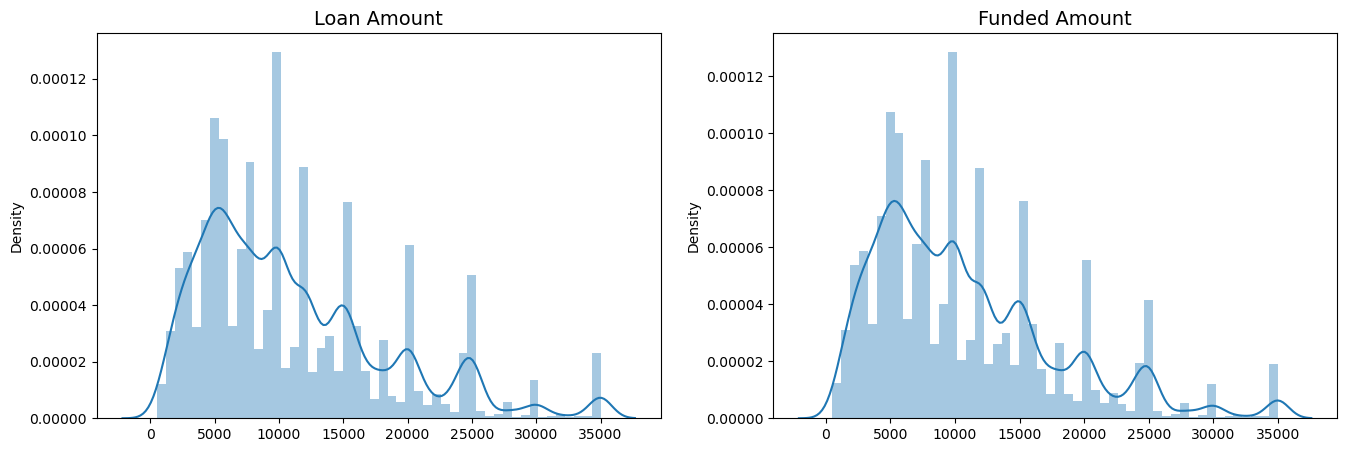

In [166]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.distplot(data["loan_amnt"].values , ax = ax[0])
ax[0].set_title("Loan Amount", fontsize=14)
sns.distplot(data["funded_amnt"].values, ax=ax[1])
ax[1].set_title("Funded Amount", fontsize=14)

### Loan status and Loan amount

In [167]:
loan_status = data["loan_status"].values
loan_amount = data["loan_amnt"].values


Text(0.5, 1.0, 'Loan Status')

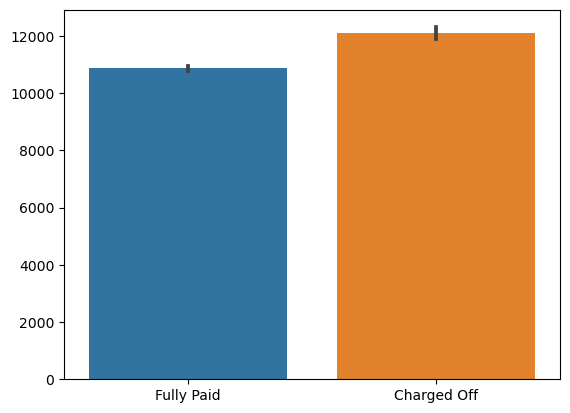

In [168]:
sns.barplot(x=loan_status,y=loan_amount)
ax[0].set_title("Loan Status", fontsize=14)

There is a high likelyhood that if the loan amount is high the probability of defaulting is high

#### Distribution of term

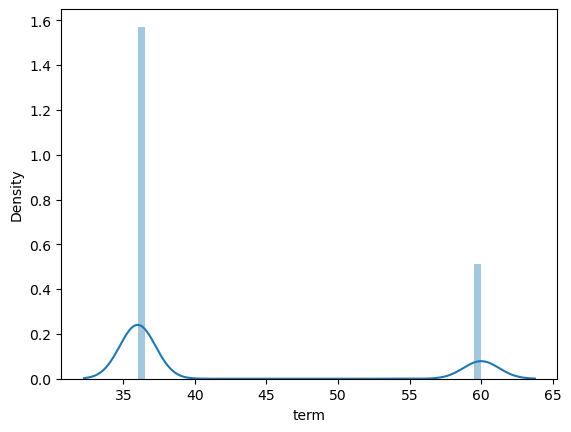

In [169]:
sns.distplot(data.term)
plt.show()

#### Loan status with Funded amount against Loan status

Text(0.5, 1.0, 'Loan Status')

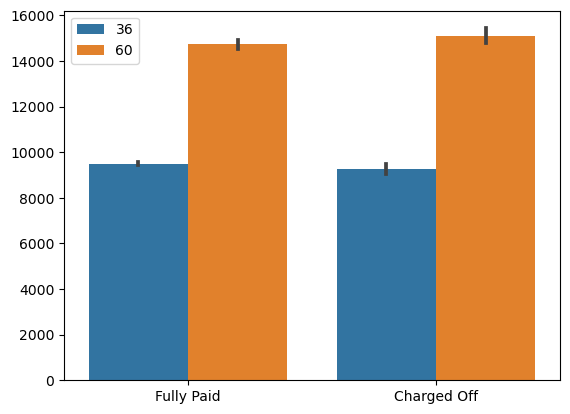

In [170]:
loan_status = data["loan_status"].values
funded_amount = data["funded_amnt"].values

term = data["term"].values
grade = data["grade"].values

sns.barplot(x=loan_status,y=funded_amount,hue=term)
ax[0].set_title("Loan Status", fontsize=14)

#### Interest rate against Loan amount


Text(0.5, 1.0, 'Loan Status')

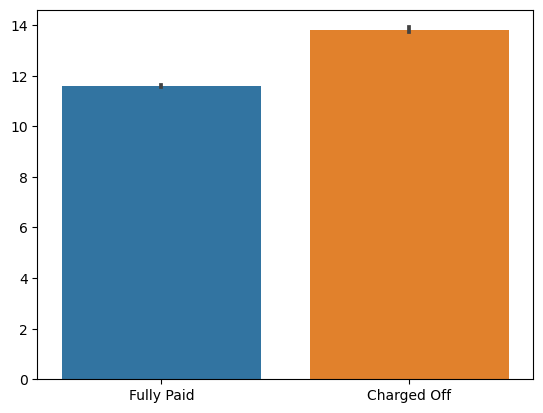

In [171]:
interest_rate = data["int_rate"].values

sns.barplot(x=loan_status,y=interest_rate)
ax[0].set_title("Loan Status", fontsize=14)

In [172]:
#Higher interest rate loans seem to have higher defaulters

#### Loan sanctioned across years and months

In [174]:
data.month.shape

(38577,)

In [175]:
data.year.shape

(38577,)

In [176]:
data.loan_status.shape

(38577,)

In [177]:
charged_off_only = data[data['loan_status']=='Charged Off'];

In [178]:
year_values = charged_off_only["year"].value_counts().values

In [179]:
year_index =  charged_off_only["year"].value_counts().index

In [180]:
month_values = charged_off_only["month"].value_counts().values

In [181]:
month_index =  charged_off_only["month"].value_counts().index

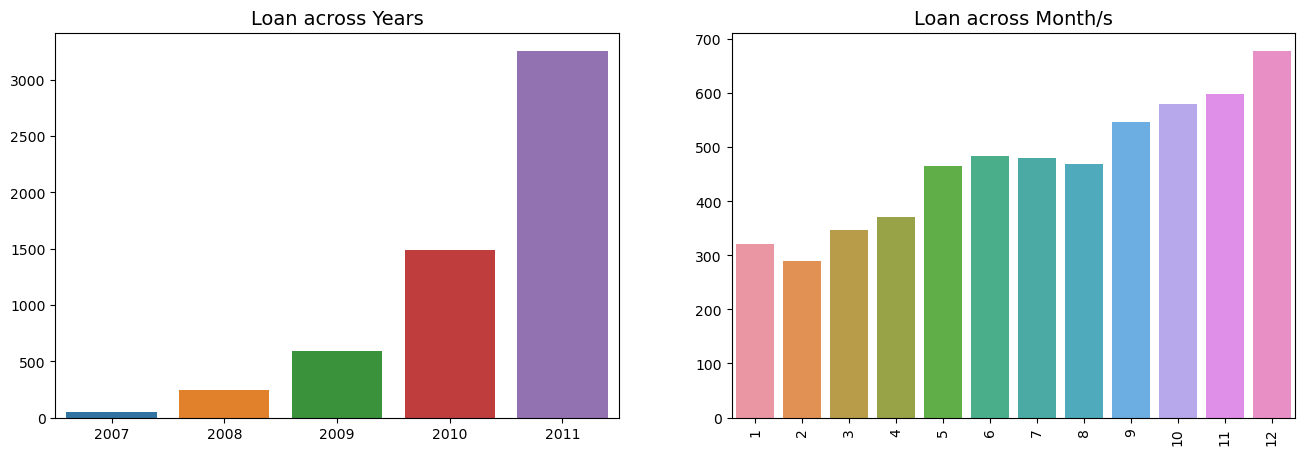

In [182]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.barplot(data =charged_off_only,x=year_index, y=year_values,ax = ax[0])
plt.xticks(rotation=90)
ax[0].set_title("Loan across Years", fontsize=14)

sns.barplot(data =charged_off_only,x=month_index, y=month_values, ax = ax[1])
plt.xticks(rotation=90)
ax[1].set_title("Loan across Month/s", fontsize=14)

plt.show()

#### Observation/s : Max Loans were given in 2011 and in month of December and they have higher tendency to default. Spike is observed in the mid year, in the months of June and July

#### Loan amount v/s year and month of issue

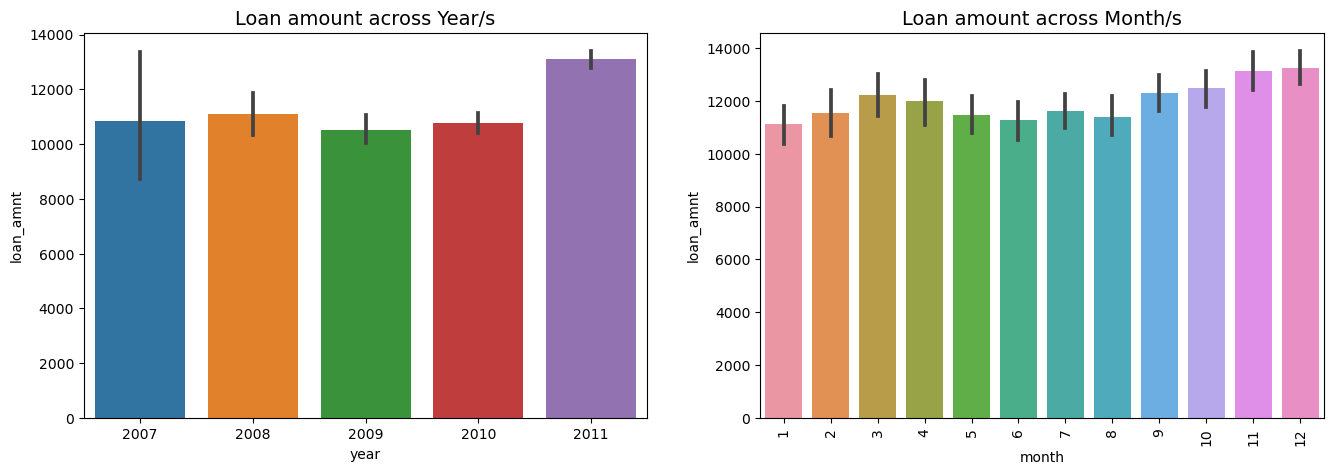

In [183]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.barplot(data =charged_off_only,x=charged_off_only.year, y=charged_off_only.loan_amnt,ax = ax[0])
plt.xticks(rotation=90)
ax[0].set_title("Loan amount across Year/s", fontsize=14)

sns.barplot(data =charged_off_only,x=charged_off_only.month, y=charged_off_only.loan_amnt, ax = ax[1])
plt.xticks(rotation=90)
ax[1].set_title("Loan amount across Month/s", fontsize=14)

plt.show()

#### Observation/s : No much to infer from amount of loan given acroos year/s and month/s.

#### Grade column distribution

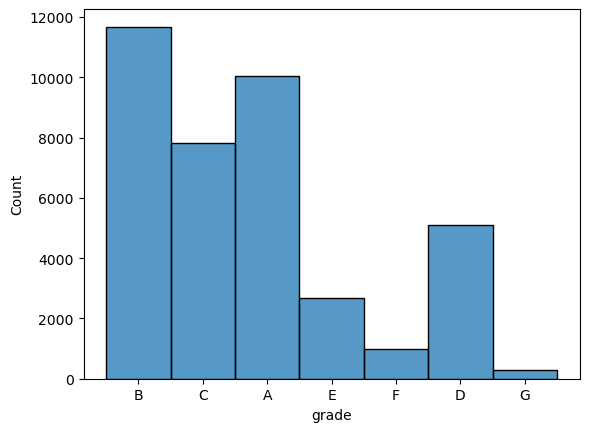

In [184]:
sns.histplot(data.grade)
plt.show()

In [185]:
data[data['grade'] == 'D']['loan_status'].value_counts()

Fully Paid     3967
Charged Off    1118
Name: loan_status, dtype: int64

In [186]:
data[data['grade'] == 'G']['loan_status'].value_counts()

Fully Paid     198
Charged Off    101
Name: loan_status, dtype: int64

In [187]:
data[data['grade'] == 'B']['loan_status'].value_counts()


Fully Paid     10250
Charged Off     1425
Name: loan_status, dtype: int64

In [188]:
data[data['grade'] == 'C']['loan_status'].value_counts()

Fully Paid     6487
Charged Off    1347
Name: loan_status, dtype: int64

In [189]:
data[data['grade'] == 'A']['loan_status'].value_counts()

Fully Paid     9443
Charged Off     602
Name: loan_status, dtype: int64

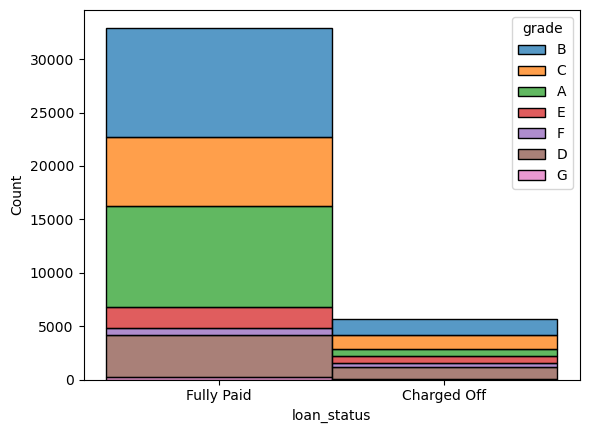

In [190]:
sns.histplot(binwidth=0.5, x=data['loan_status'], hue=data['grade'], data=data, stat="count", multiple="stack")
plt.show()

#### Observation/s : Loans with grade B,C,D have high probability of defaulters. This is not so clear analysing further 

In [191]:
#Creating new data set for conveting loan staus column to numeric

In [192]:
data1 = data[data['loan_status']!='Current']
data1['loan_status'] = data1['loan_status'].apply(lambda x : 0 if x=='Fully Paid' else 1)
data1['loan_status'] = data1['loan_status'].apply(lambda x:pd.to_numeric(x))

In [193]:
data1['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

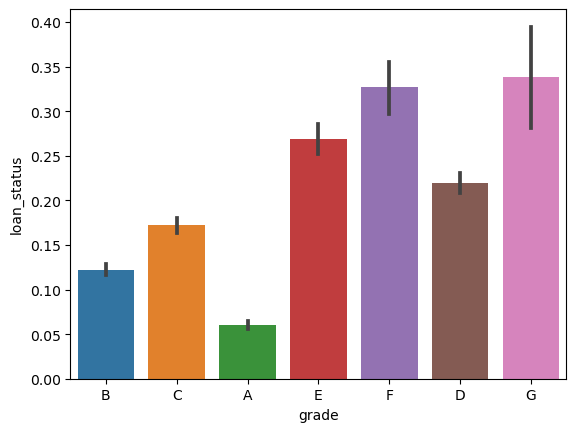

In [194]:
sns.barplot( y=data1['loan_status'], x=data1['grade'], data=data1)
plt.show()

#### Observation/s : With this graph it's more clear that, loans given out with grade E,F and G have high probability of defaulters

#### Loan status with Verification staus

<Axes: xlabel='loan_status', ylabel='Count'>

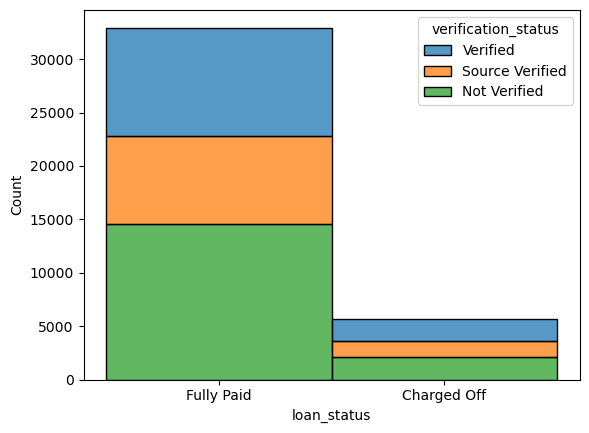

In [195]:
sns.histplot(binwidth=0.5, x=data.loan_status, hue=data.verification_status, data=data, stat="count", multiple="stack")


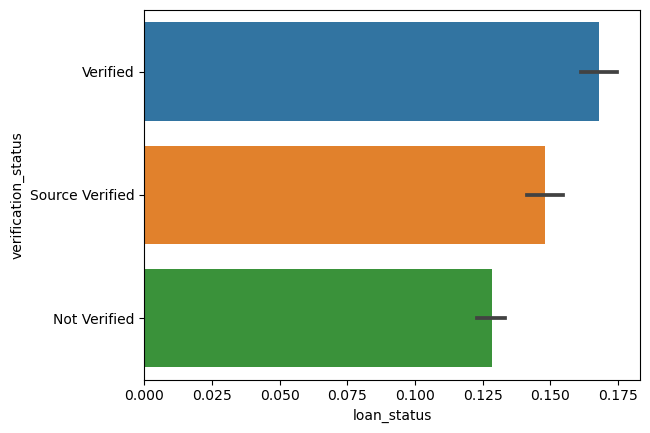

In [196]:
sns.barplot( x=data1['loan_status'], y=data1['verification_status'], data=data1)
plt.show()

In [197]:
# There seems to be no differnce wrt verification status

#### Employment Length vc loan status


In [198]:
data['emp_length'] = data['emp_length'].str.replace('<','').str.replace('+','').str.replace(' years','').str.replace(' year','')

data['emp_length']


## check count of Nan

nan_count = data['emp_length'].isna().sum()

print(nan_count)

1033


In [199]:
emp_comparision = data.dropna(subset=['emp_length'])

emp_comparision.shape

(37544, 49)

In [200]:
emp_comparision['emp_length'] = emp_comparision['emp_length'].astype(int)

emp_comparision['emp_length'].dtype

dtype('int32')

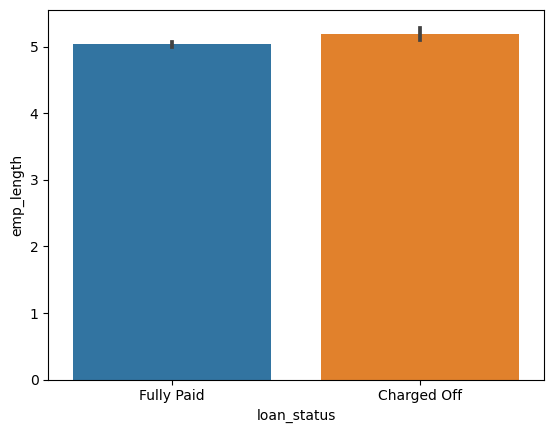

In [201]:
sns.barplot(x=emp_comparision.loan_status,y= emp_comparision["emp_length"])
plt.show()

#### Emploment length v/s Loam amount with Loan status

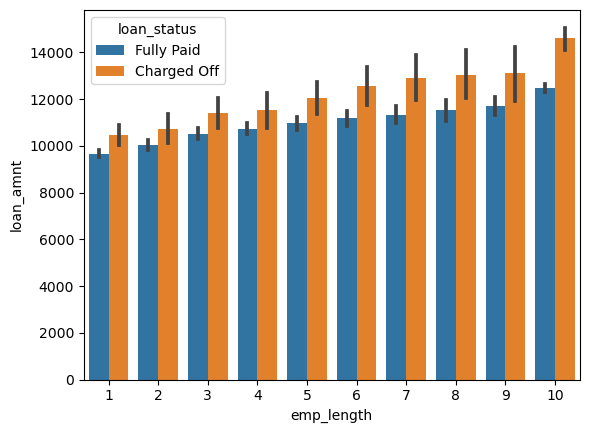

In [202]:
sns.barplot(x= emp_comparision.emp_length, y=emp_comparision.loan_amnt,  hue=emp_comparision.loan_status, data=emp_comparision)
plt.show()

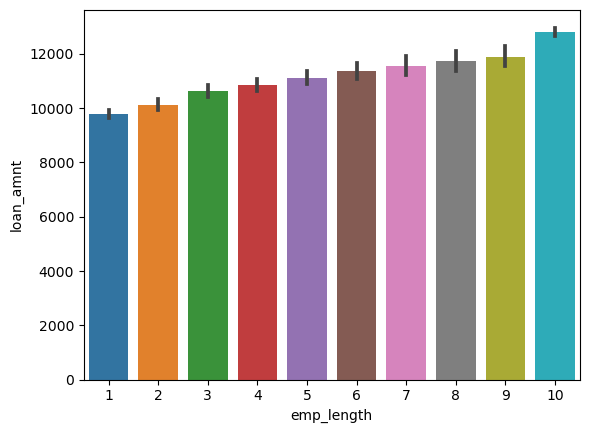

In [203]:
sns.barplot(x=emp_comparision.emp_length, y=emp_comparision.loan_amnt )
plt.show()

#### Observation/s : Its found that people with higher experience tend have higher loan amount and there is a higher probability of them not paying back

#### Checking home_ownership with respect to loan status


<Axes: xlabel='loan_status', ylabel='Count'>

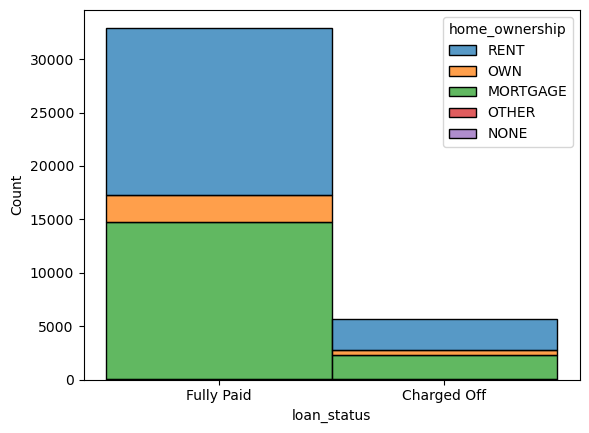

In [204]:

sns.histplot(binwidth=0.5, x=data.loan_status, hue=data.home_ownership, data=data, stat="count", multiple="stack")

### Observation : People who are renting or paying mortgage are having higher percentage of defaulting when compoared to those who own a home


#### Annual income v/s Loan status

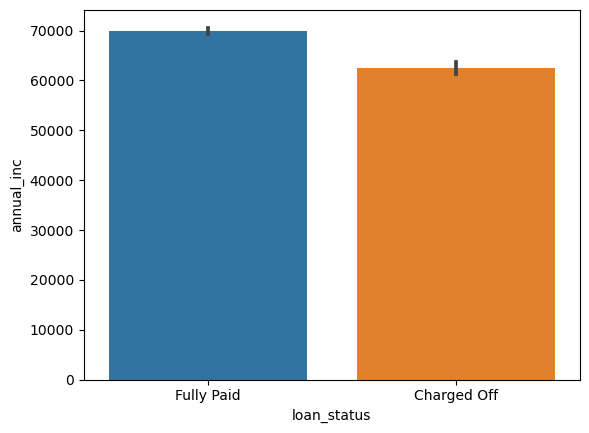

In [205]:
sns.barplot(y=data.annual_inc, x=data.loan_status )
plt.show()

#### Loan purpose with respect to loan status


In [206]:
data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

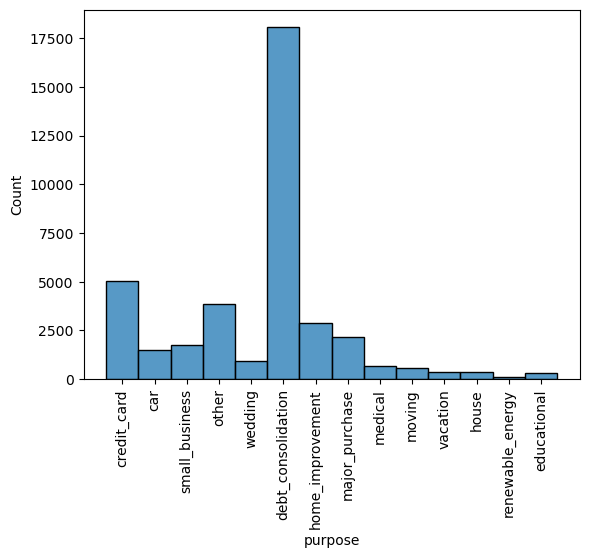

In [207]:
sns.histplot(data.purpose)
plt.xticks(rotation=90)
plt.show()

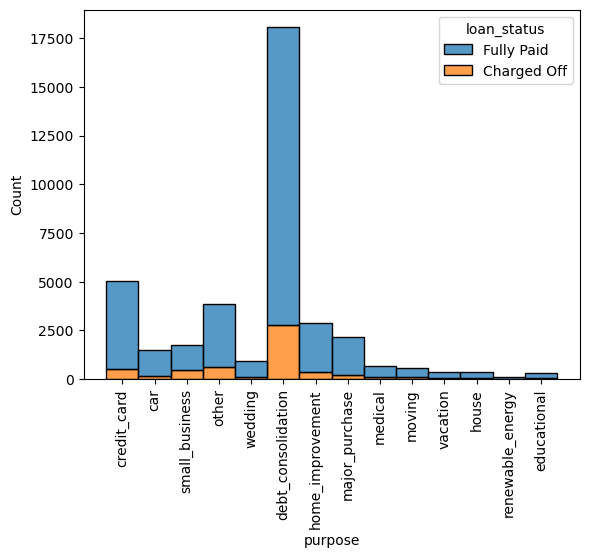

In [208]:
sns.histplot(hue=data.loan_status, x=data.purpose ,data=data, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='count', ylabel='purpose'>

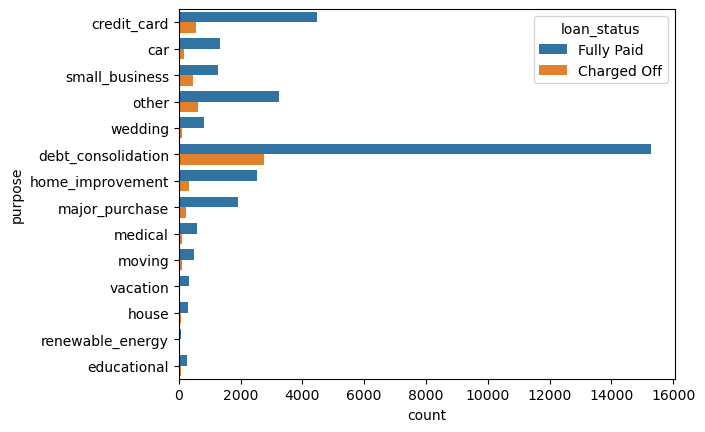

In [209]:
sns.countplot(data=data, y=data.purpose, hue=data.loan_status)

In [210]:
data['addr_state'].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

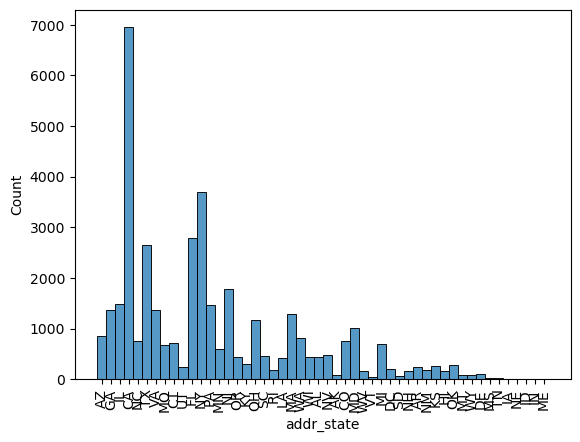

In [211]:
sns.histplot(data.addr_state)
plt.xticks(rotation=90)
plt.show()

<Axes: >

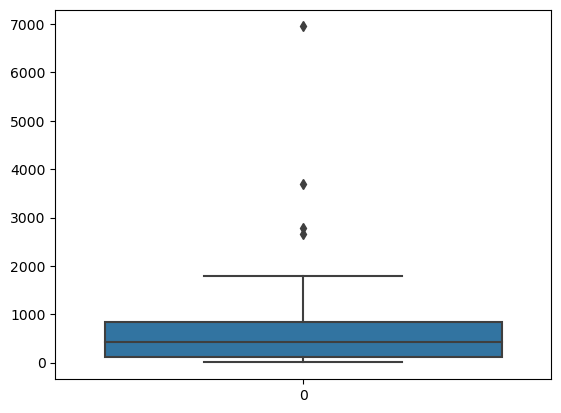

In [212]:
sns.boxplot(data["addr_state"].value_counts())

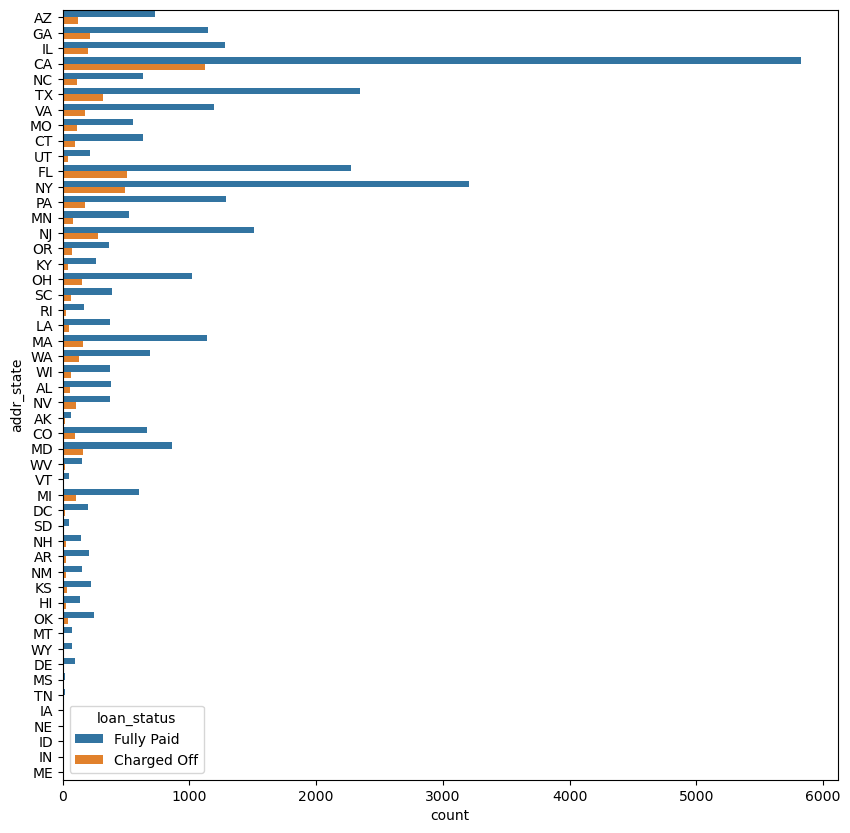

In [213]:
plt.figure(figsize=(10, 10)) 
sns.countplot(data=data, y=data.addr_state, hue=data.loan_status)
plt.show()

In [214]:
# loan amt vs dti with hue as loan status -> TODO
# try doing with other columns as well to compare
# do derived analysis with month
# compare averages

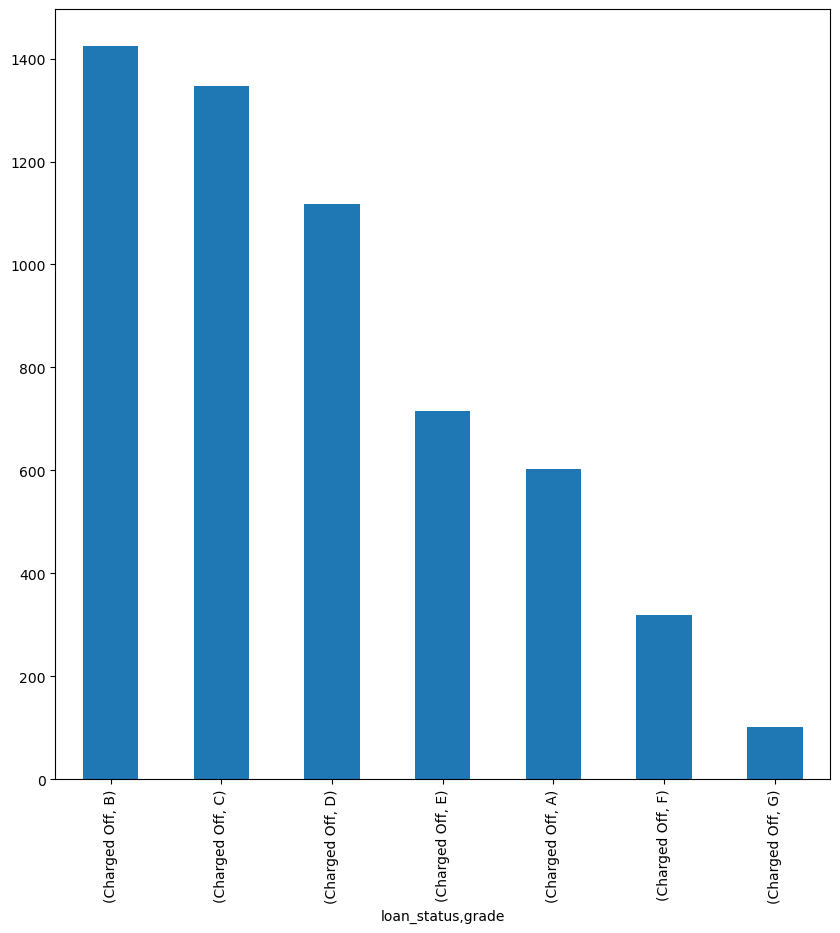

In [215]:
plt.figure(figsize=(10, 10)) 
charged_off_only = data[data['loan_status']=='Charged Off'];
grouped_data = charged_off_only.groupby('loan_status')['grade'].value_counts();
grouped_data.plot(kind='bar', stacked=True)
plt.show()

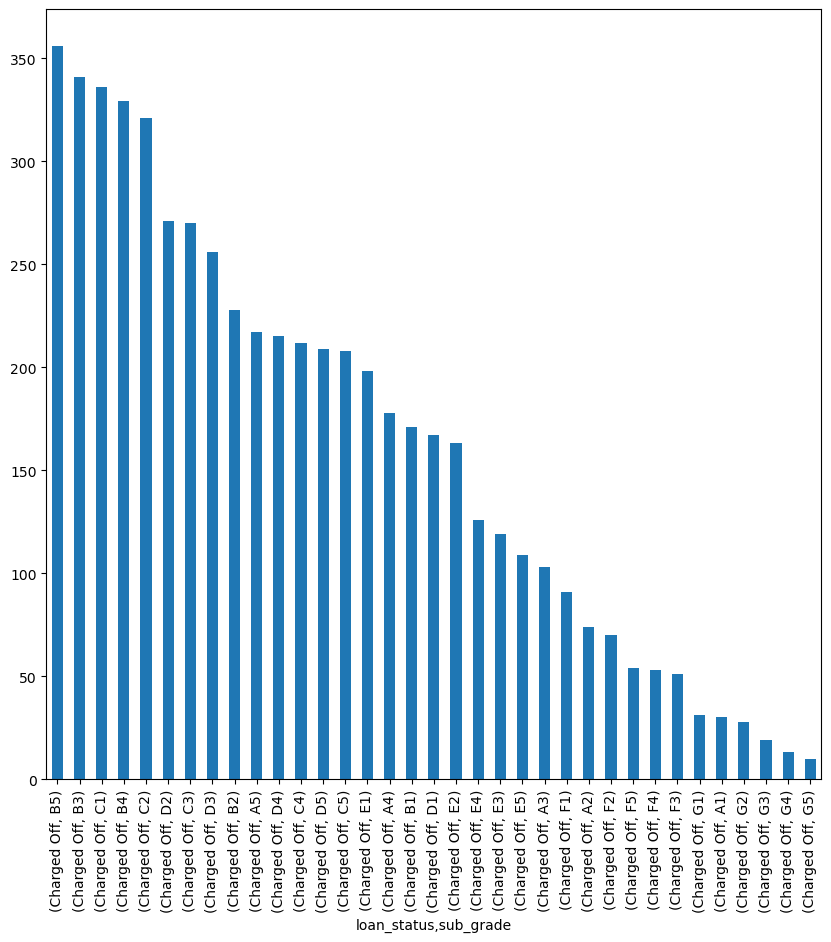

In [216]:
plt.figure(figsize=(10, 10)) 
charged_off_only = data[data['loan_status']=='Charged Off'];
grouped_data = charged_off_only.groupby('loan_status')['sub_grade'].value_counts();
grouped_data.plot(kind='bar', stacked=True)
plt.show()

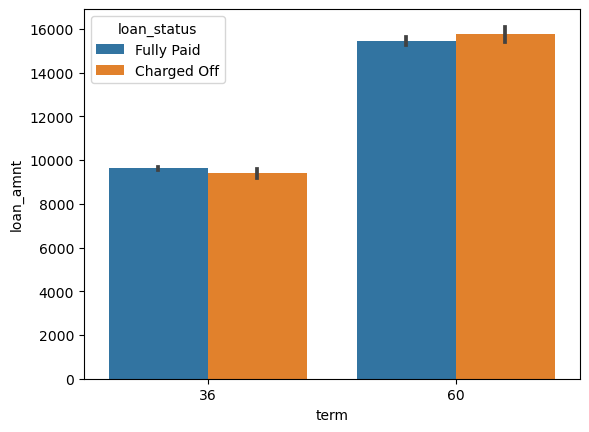

In [217]:
# loan amt . income vs dti with hue as loan status -> TODO
## loan amt . home ownership vs dti with hue as loan status -> TODO
sns.barplot(x=data.term, y=data.loan_amnt, hue=data.loan_status)
plt.show()

when loan amount is higher along with the term being 60 months, there is a higher probability of defaulting

## Home ownership with Loan status

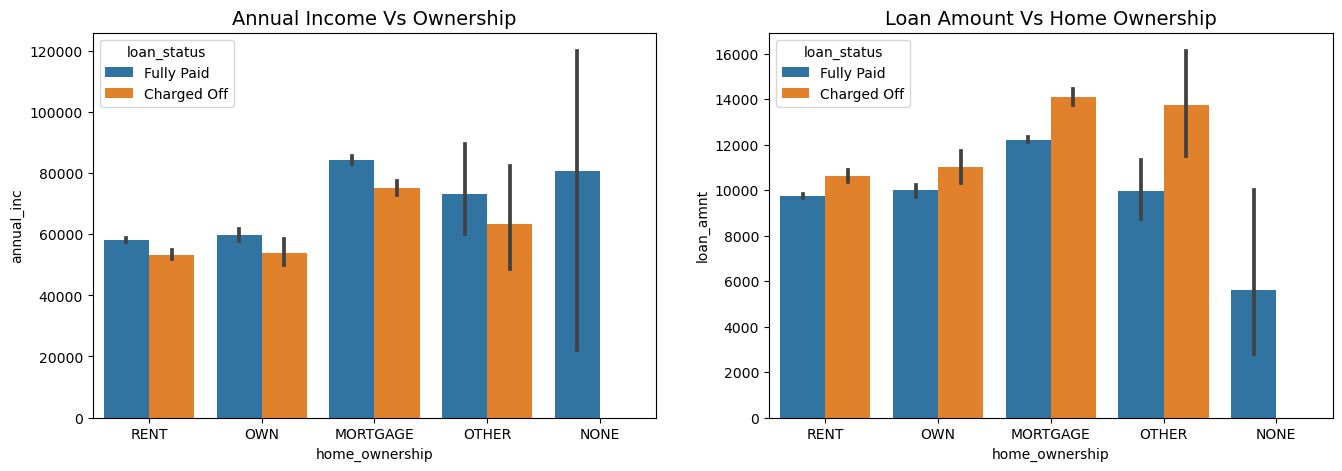

In [218]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.barplot(x=data.home_ownership, y=data.annual_inc, hue=data.loan_status, ax = ax[0])
ax[0].set_title("Annual Income Vs Ownership", fontsize=14)

sns.barplot(x=data.home_ownership, y=data.loan_amnt, hue=data.loan_status, ax = ax[1])
ax[1].set_title("Loan Amount Vs Home Ownership", fontsize=14)

plt.show()

when comparing with annual income and home ownership , and with loan amount with home ownership, there is a high likely hood for increased defaulters if they are paying Mortage even when they have a higher annual income.
On further analysis, it is ill advised to provide higher loan amounts to individuals who pay mortage, or they would have to undergo additional verification before approval is recommened.

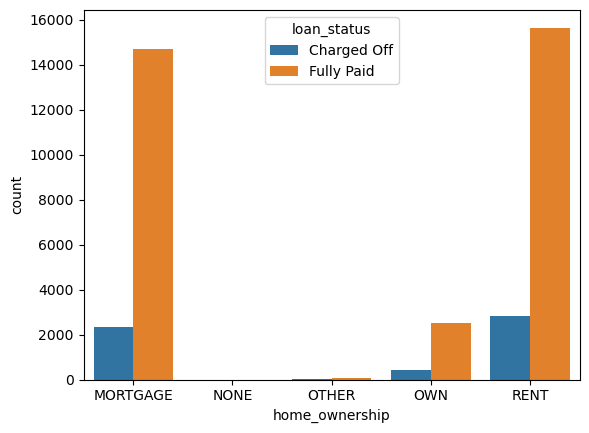

In [219]:
count_data = data.groupby(['home_ownership','loan_status']).size().reset_index(name='count')
sns.barplot(x='home_ownership', y='count', hue='loan_status', data=count_data)
plt.show()

From the above graph we can see that Mortage , Own and Rent are the most types of ownerships we have in terms of volume , 
and among them , People having Mortage and Rent still show higher chance of defaulting, compared to people who own their 
house

Text(0.5, 1.0, 'Purpose Vs income (Charged off only)')

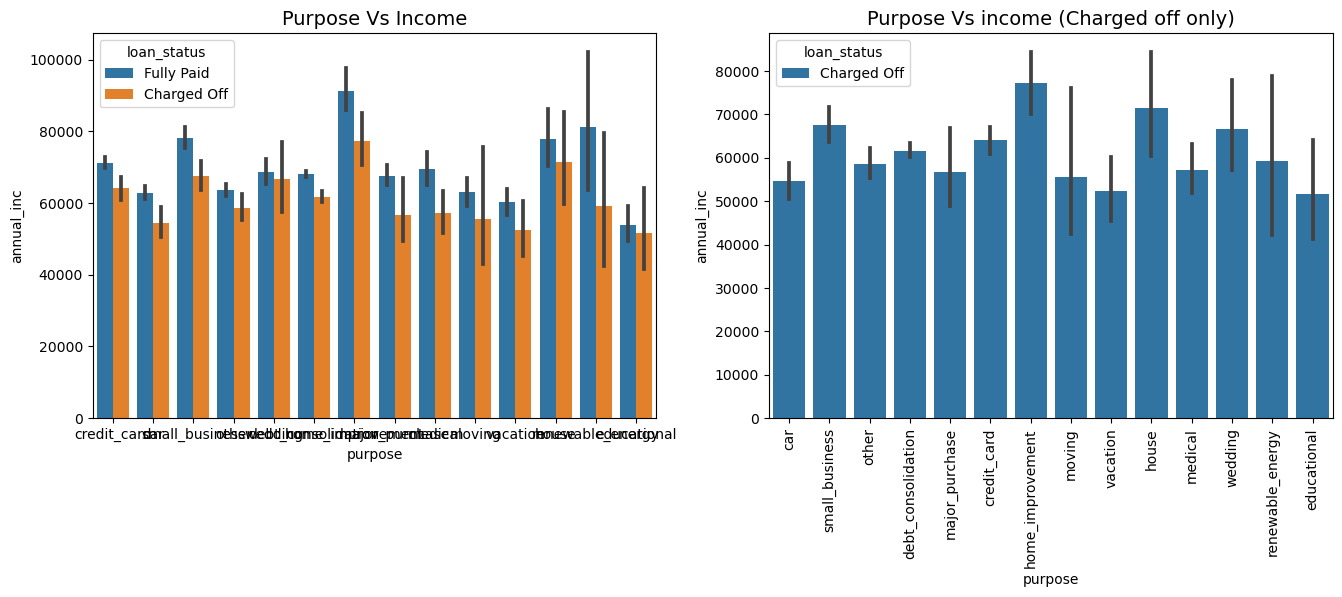

In [220]:


fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.barplot(data =data,x=data.purpose, y=data.annual_inc, hue =data.loan_status, ax = ax[0])
plt.xticks(rotation=90)
ax[0].set_title("Purpose Vs Income", fontsize=14)

charged_off_only = data[data['loan_status']=='Charged Off'];
sns.barplot(data =data,x=charged_off_only.purpose, y=charged_off_only.annual_inc, hue =charged_off_only.loan_status, ax = ax[1])
plt.xticks(rotation=90)
ax[1].set_title("Purpose Vs income (Charged off only)", fontsize=14)

#### Observation : On first alalysis of purpose with loan status we saw that debt_consildation had higher default rate where as when compared along with annual income, people who tend to take loan for home_imporvement tend to default

In [221]:
# plt.figure(figsize=(10, 10)) 
# sns.countplot(data=data, y=data.addr_state, hue=data.loan_status)
# plt.show()


#group interest rates into segments and compare with other columns , hue = loan_status

#plot for address with annual income (we can probably group into segment as well), hue = loan_status



- Reduce loss to bank
- Find defaulters
- People who can pay back the amount
- For this case study: Defaulters is the goal, for future loan approvals

Remove columns that do not contribute like : columns that indicate "current" staus of loan
month_since_last_deliq?

Remove where more than 5 columns have null values


### Checking if any corealation exists between Address state and Loan Status

Text(0.5, 1.0, 'Address Vs Annual Income')

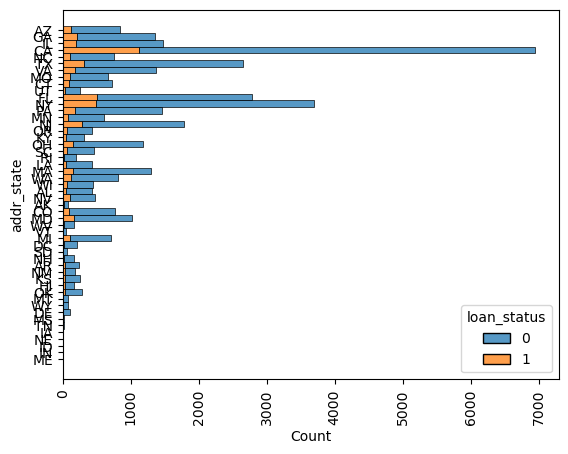

In [223]:
sns.histplot(data =data1,y=data1.addr_state, hue=data1.loan_status,stat="count", multiple="stack")
plt.xticks(rotation=90)
ax[0].set_title("Address Vs Annual Income", fontsize=14)


#### Observation : we couldnt draw any conclusions from the chart other than the trend of higher loan applicants in California. But this information seems to be not relavent at the moment

### Analysis by categorizing Annual income

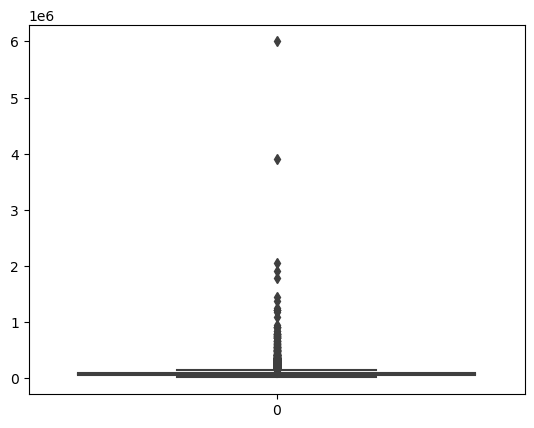

In [224]:
sns.boxplot(data1.annual_inc)
plt.show()

In [225]:
#removing the outliers
data1= data1[data1.annual_inc < 3000000]

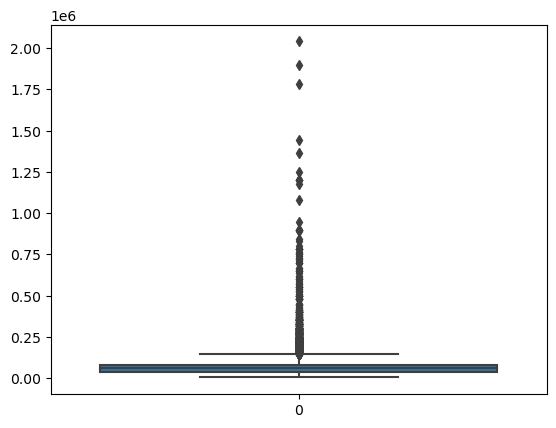

In [226]:
sns.boxplot(data1.annual_inc)
plt.show()

In [227]:
data1= data1[data1.annual_inc < 1500000]

In [228]:
data1[data1.annual_inc > 1000000].shape

(9, 49)

In [229]:
data1= data1[data1.annual_inc < 1000000]

In [230]:
data1.annual_inc.value_counts()

60000.0     1466
50000.0     1029
40000.0      855
45000.0      811
30000.0      808
            ... 
34884.0        1
80569.0        1
82116.0        1
242400.0       1
27376.0        1
Name: annual_inc, Length: 5204, dtype: int64

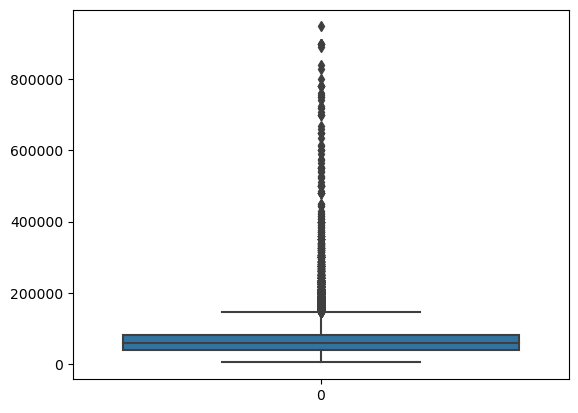

In [231]:
sns.boxplot(data1.annual_inc)
plt.show()

In [232]:
#check the min and max values in annual_inc

max_value = data1['annual_inc'].max()
min_value = data1['annual_inc'].min()

print(max_value, min_value)

948000.0 4000.0


In [233]:
#function to categorize loan amout 
def categorize_annual_amnt(value):
    if value<30000 :
        return "0-30k"
    elif value >=30000 and value < 60000:
        return  "30k-60k"
    elif value >= 60000 and value < 90000:
        return "60k-90k"
    elif value >= 90000 and value < 150000:
        return "90k-150k"
    elif value >= 150000 and value < 300000:
        return "150k-300k"
    elif value >= 300000 and value < 600000:
        return "300k-600k"
    elif value >= 600000:
        return "600k-948k"

In [234]:
#creating new column with function

data1['annual_income_category'] = data1['annual_inc'].apply(lambda x:categorize_annual_amnt(x))


In [235]:
data1['annual_income_category'].value_counts()

30k-60k      15752
60k-90k      11049
90k-150k      6324
0-30k         3743
150k-300k     1491
300k-600k      167
600k-948k       37
Name: annual_income_category, dtype: int64

Text(0.5, 1.0, 'Address Vs Annual Income')

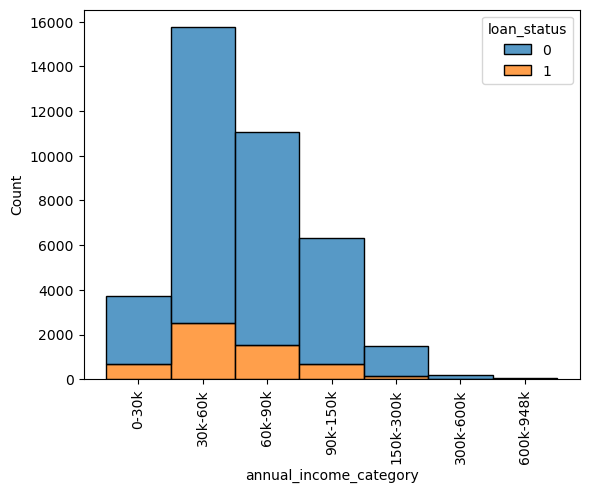

In [236]:

sns.histplot(data =data1,hue=data1.loan_status, x=data1.annual_income_category,stat="count", multiple="stack")
plt.xticks(rotation=90)
ax[0].set_title("Address Vs Annual Income", fontsize=14)


### Observation : While looking at the loan status with only Annual income range of 30k to 60k tend to default on their loan more

Text(0.5, 1.0, 'Loan amount Vs Annual Income')

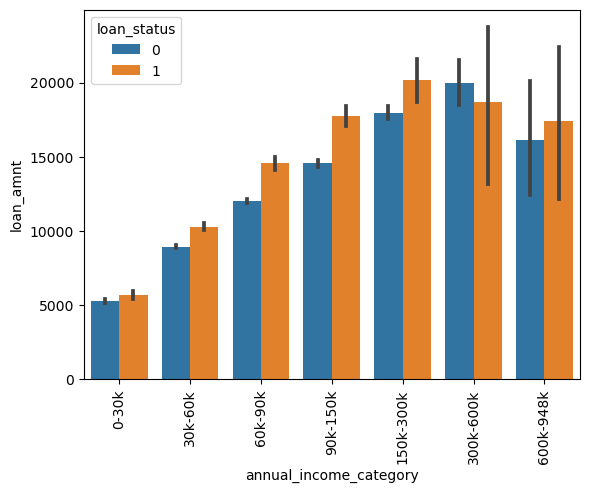

In [237]:
sns.barplot(data =data1,x=data1.annual_income_category, y=data1.loan_amnt , hue=data1.loan_status )
plt.xticks(rotation=90)
ax[0].set_title("Loan amount Vs Annual Income", fontsize=14)

### Observation : While looking at the loan status with Annual income and Loan amount range of 150k to 300k tend to default on their loan more

### Annual income category with Home ownership

Text(0.5, 1.0, 'Loan amount Vs Annual Income')

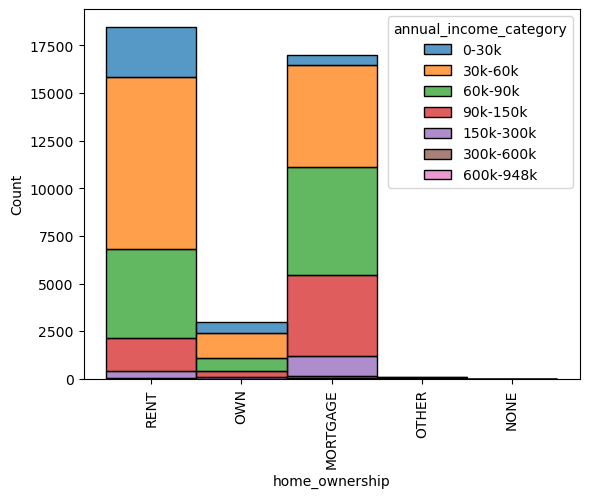

In [238]:
sns.histplot(data =data1,hue=data1.annual_income_category, x=data1.home_ownership, stat="count", multiple="stack" )
plt.xticks(rotation=90)
ax[0].set_title("Loan amount Vs Annual Income", fontsize=14)

### Observation : Earlier we observed that annual income range 30k-60k were defaulting more and with above graph we see that home-ownership of this categroy is mostly own or mortgage

#### DTI : Your debt-to-income ratio (DTI) is all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

In [239]:
#dti column check

data['dti'].isna().sum()

0

Text(0.5, 1.0, 'Loan amount Vs Annual Income')

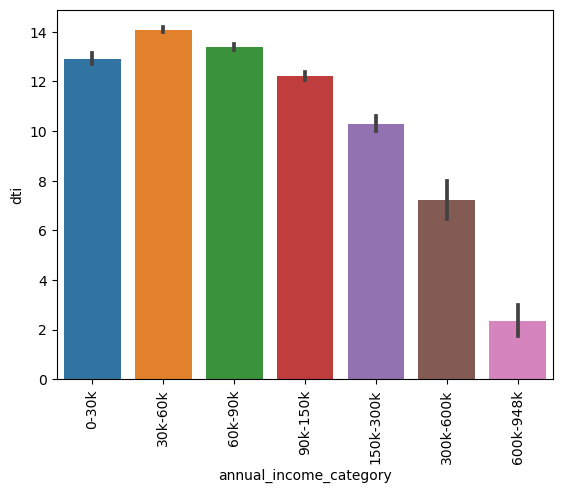

In [240]:
sns.barplot(data =data1,x=data1.annual_income_category, y=data1.dti  )
plt.xticks(rotation=90)
ax[0].set_title("Loan amount Vs Annual Income", fontsize=14)

Text(0.5, 1.0, 'Loan amount Vs Annual Income')

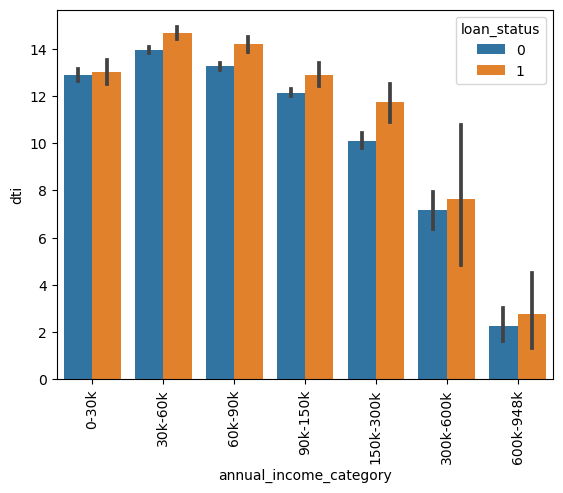

In [241]:
sns.barplot(data =data1,x=data1.annual_income_category, y=data1.dti ,hue = data1.loan_status  )
plt.xticks(rotation=90)
ax[0].set_title("Loan amount Vs Annual Income", fontsize=14)

### Analysing by categorizing interest rate

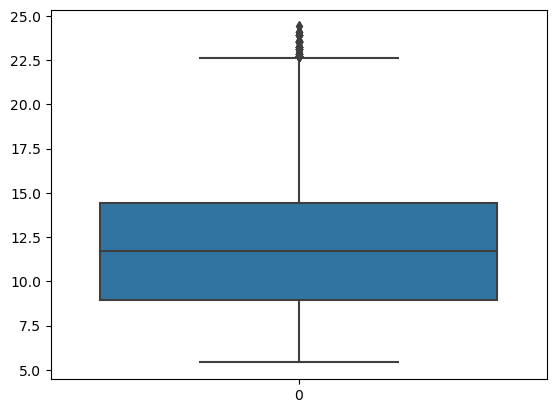

In [242]:
sns.boxplot(data1.int_rate)
plt.show()

In [243]:

max_value = data1['int_rate'].max()
min_value = data1['int_rate'].min()

print(max_value, min_value)

24.4 5.42


In [244]:
data.int_rate.head(10)

0     10.65
1     15.27
2     15.96
3     13.49
5      7.90
6     15.96
7     18.64
8     21.28
9     12.69
10    14.65
Name: int_rate, dtype: float64

In [245]:

#function to categorize interest rate 
def categorize_interest_rate(value):
    if value<5 :
        return "0-5%"
    elif value >=5 and value < 10:
        return  "5-10%"
    elif value >= 10 and value < 15:
        return "10-15%"
    elif value >= 15 and value < 20:
        return "15-20%"
    elif value >= 20 and value < 25:
        return "20-25%"
    elif value >= 25:
        return ">25%"

In [246]:
data1['int_rate_category'] = data1['int_rate'].apply(lambda x:categorize_interest_rate(x))


In [247]:
data1['int_rate_category'].value_counts()

10-15%    18508
5-10%     12060
15-20%     7225
20-25%      770
Name: int_rate_category, dtype: int64

<Axes: xlabel='loan_amnt', ylabel='Count'>

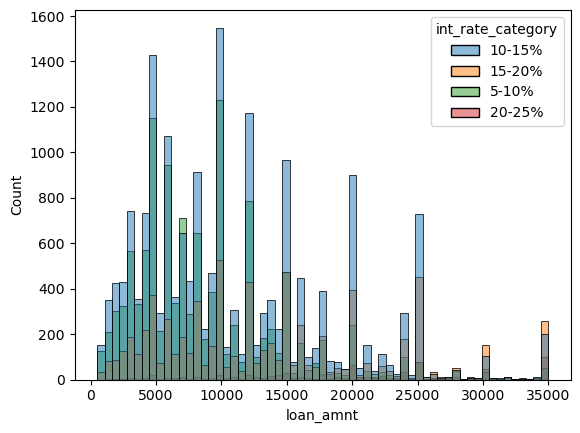

In [273]:
sns.histplot(data =data1,x=data1.loan_amnt ,hue = data1.int_rate_category  )

### Analysing by categorizing loan amount

In [248]:

max_value = data1['loan_amnt'].max()
min_value = data1['loan_amnt'].min()

print(max_value, min_value)

35000 500


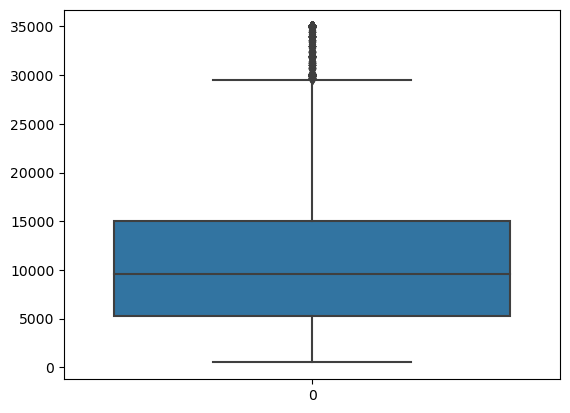

In [249]:
sns.boxplot(data1.loan_amnt)
plt.show()

In [250]:
data.loan_amnt.value_counts()

10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: loan_amnt, Length: 870, dtype: int64

In [286]:
#function to categorize loan amount
def categorize_loan_amount(value):
    if value >= 500 and value < 3000:
        return "500-3k"
    elif value>=3000 and value < 6000:
        return "3k-6k"
    elif value >= 6000 and value < 9000:
        return "6k-9k"
    elif value >= 9000 and value < 12000:
        return "9k-12k"
    elif value >= 12000 and value < 15000:
        return "12k-15k"
    elif value >= 15000 and value < 20000:
        return "15k-20k"
    elif value >= 20000 and value < 30000:
        return "20k-30k"
    elif value >= 30000:
        return "30k +"

In [287]:
data1['loan_amount_category'] = data1['loan_amnt'].apply(lambda x:categorize_loan_amount(x))


<Axes: >

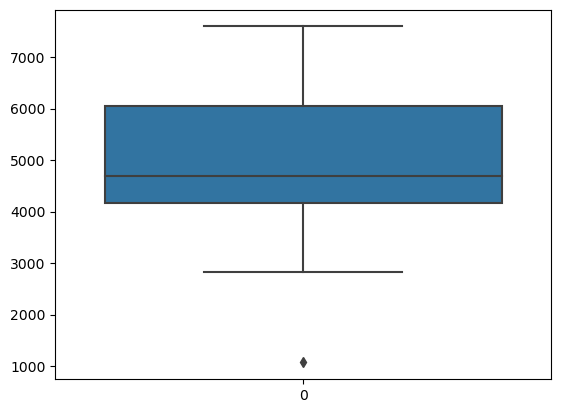

In [288]:
sns.boxplot(data1['loan_amount_category'].value_counts())

In [290]:
#higher is the loan amount category , higher the interest rate and higher the chance of defaulting


<Axes: xlabel='int_rate', ylabel='loan_amount_category'>

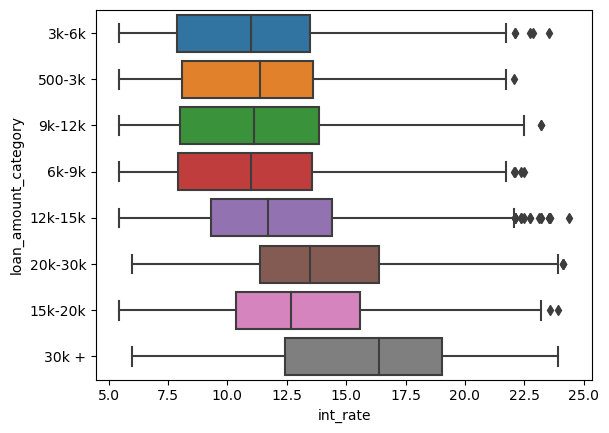

In [295]:
sns.boxplot(data =data1,x=data1.int_rate, y= data1.loan_amount_category)


The interest rate is hight is loan amount is high

<Axes: xlabel='loan_amount_category', ylabel='int_rate'>

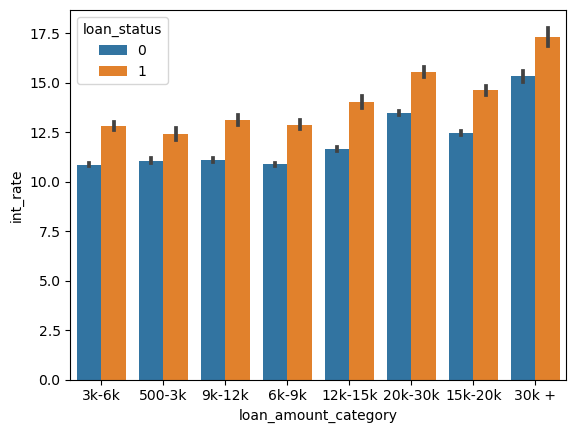

In [296]:
sns.barplot(data =data1,y=data1.int_rate,  x= data1.loan_amount_category , hue= data1.loan_status)


#### Observation :  people with high loan amount and hight interest rate , also have high chance of defaulting

<Axes: xlabel='int_rate_category', ylabel='count'>

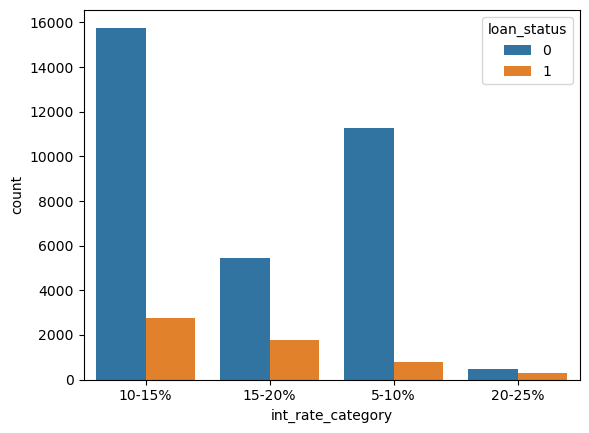

In [308]:
sns.countplot(data =data1,x=data1.int_rate_category, hue= data1.loan_status)



<Axes: ylabel='Density'>

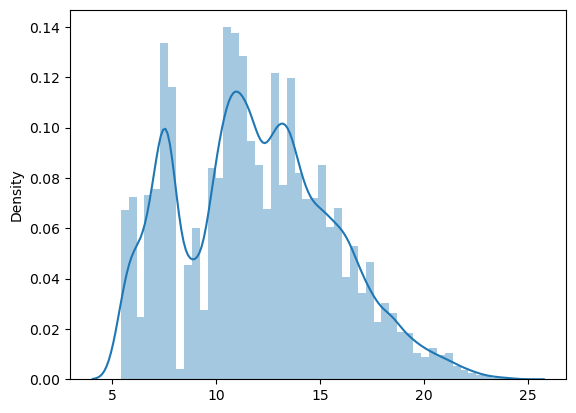

In [310]:
sns.distplot(x=data1.int_rate)



In [ ]:
#check with installments 
# mths_since_last_record
#pub_rec